<a href="https://colab.research.google.com/github/PabloCaSan/Machine_Learning_Notes/blob/main/RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística

En esta libreta se aplicará un modelo de regresión logística a datos de diabetes. El modelo asignará valores de 0 y 1 para determinar si una persona tiene diabetes o no, basado en los datos de entrenamiento

Cargamos el archivo

In [1]:
import io
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


Cargamos las librerías

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
%matplotlib inline

Exploramos los datos

In [11]:
df = pd.read_csv('/content/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.shape

(768, 9)

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Elegimos las columnas que usaremos

In [18]:
columnas = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = df[columnas]
y = df.Outcome

Elegimos las variables de entrenamiento

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

Aplicamos la regresión logística

In [21]:
regresion = LogisticRegression()
regresion.fit(X_train, y_train)
y_pred = regresion.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Veamos el resultado de la predicción

In [22]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

Los ceros son 'no tiene diabetes' y los unos son 'sí tiene diabetes'. Veamos si coinciden con los datos originales, para ello usamos una matriz de confusión

In [23]:
matriz_conf = metrics.confusion_matrix(y_test, y_pred)
matriz_conf

array([[117,  13],
       [ 24,  38]])

Para ver más fácil hagamos una visualización gráfica

Text(0.5, 320.8, 'Etiqueta de predicción')

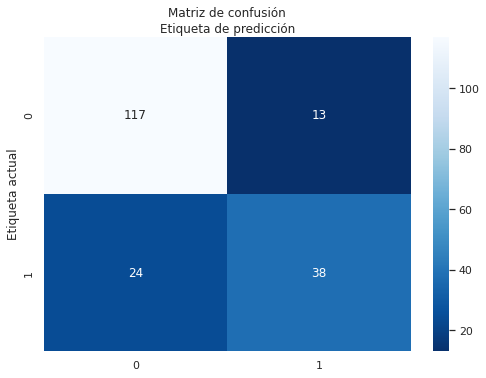

In [32]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(pd.DataFrame(matriz_conf), annot=True, cmap='Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')

De donde 117 son los verdaderos positivos, 36 son los verdaderos negativos, 13 son falsos negativos y 24 son falsos positivos. Veamos de forma cuantitativa cual es la exactitud

In [35]:
print("Exactitud", metrics.accuracy_score(y_test, y_pred))

Exactitud 0.8072916666666666


Es decir que hay un 80% de probabilidad de que el resultado sea certero